# Lab 4: Support Vector Machines

In this lab you will:
* train a support vector machine (SVM) for classification, on synthetic and real data;
* observe that SVMs are sensitive to the relative scale of input features;
* compute the "accuracy" of an SVM on held-out test data.

**Run the code cell below** to import the required packages.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.svm             # For SVC class
import sklearn.preprocessing   # For scale function
import sklearn.metrics         # for accuracy_score

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

# 1. Fitting an SVM to synthetic data

Exercises 1.1&ndash;1.7 ask you to apply scikit-learn's support vector classifier (**[sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)**) to synthetic data. The synthetic data is very simple, to help you understand how SVMs work. 

The _SVC_ object is a binary classifier, so it is used much the same way as **[sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)**. The goal of Exercise 1 is to connect mathematical concepts from lecture to the _SVC_ object's basic parameters (*C*, *kernel*, *gamma*, *degree*, *coef0*) and attributes (*support_*, *support_vectors_*, *dual_coef_*, *n_support_*).

<div style="border-bottom: 3px solid black;"></div>

### Exercise 1.1 &mdash; Build the 1D training data from lecture

Read the documentation for the *SVC* **[fit](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.fit)** method, specifically arguments $X$ (the training features) and $y$ (the training targets). In lecture we called the targets $t_i$ (like the Bishop book) rather than $y_i$ (scikit-learn) so we'll continue using $t_i$ below.

You are asked to build the small training set shown below (same as from lecture). Each pair $(x_i, t_i)$ comprises an _feature_ input $x_i \in \mathbb{R}$ and a corresponding _class label_ target $t_i \in \{-1, +1\}$:

$$
\mathcal{D} = \{(2,-1), (8,+1), (10,+1)\}
$$

This training set can be depicted as below, where red indicates negative class and blue indicates positive class:
![image](img/toydata.png)

**Write a few lines of code** to define a variable $X$ that refers to a $3 \times 1$ matrix of features (dtype *float64*), and a variable $t$ that refers to a length-3 array of targets (dtype *int32*). The features and targets should correspond to $\mathcal{D}$ above.

In [20]:
# Your code here. Aim for 2-4 lines.
X = np.array([2, 8, 10], dtype='float64').reshape(3, 1)
t = np.array([-1, 1, 1], dtype='int32')


**Check your answer** by running the code cell below.

In [21]:
assert 'X' in globals(), "No X variable!"
assert 't' in globals(), "No t variable!"
assert isinstance(X, np.ndarray)
assert isinstance(t, np.ndarray)
assert X.shape == (3, 1)
assert t.shape == (3,)
assert X.dtype == np.float64
assert t.dtype in (np.int32, np.int64)
assert np.array_equal(X.ravel()[[-1,0,-2]], [10,2,8]), "Hmm features look wrong"
assert np.array_equal(t.ravel()[[-1,0,-2]], [1,-1,1]), "Hmm targets look wrong"
print("Correct!")

Correct!


<div style="border-bottom: 3px solid black;"></div>

### Exercise 1.2 &mdash; Train an SVM on the 1D data and inspect the support vectors

Read the first few lines of documentation for **[sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)** to learn how to at least create an _SVC_ object. You only have to worry about the _kernel_ parameter for now, not the rest. You are asked to create an _SVC_ object that uses a _linear_ kernel and fit it to training data.

**Write a few line of code** to create a variable called _svm_ that refers to a new _SVC_ object. Fit the SVM to the training data from Exercise 1.1.

In [22]:
# Your code here. Aim for 1-2 lines.
svm = sklearn.svm.SVC(kernel='linear')
svm.fit(X, t)

SVC(kernel='linear')

**Check your answer** by running the code cell below.

In [23]:
assert 'svm' in globals(), "No variable called 'svm' was found!"
assert isinstance(svm, sklearn.svm.SVC), "Expected svm to be an SVC instance!"
assert svm.kernel == 'linear', "Expected linear kernel!"
assert svm.fit_status_ == 0, "Forgot to train the SVM!"
assert hasattr(svm, 'dual_coef_'), "Forgot to train the SVM!"
assert np.array_equal(X[svm.support_], [[2.], [8.]]), "Hmm the support vectors don't look right!"
print("Looks good!")

Looks good!


**Inspect the SVM parameters** by running the code cell below. How do they compare to the values from lecture?

In [24]:
print("Support vector indices:")
print(svm.support_)

print()
print("Support vectors:")
print(svm.support_vectors_)

print()
print("Dual coefficients (t_i * alpha_i) for the support vectors:")
print(svm.dual_coef_)

Support vector indices:
[0 1]

Support vectors:
[[2.]
 [8.]]

Dual coefficients (t_i * alpha_i) for the support vectors:
[[-0.05555556  0.05555556]]


<div style="border-bottom: 3px solid black;"></div>

### Exercise 1.3 &mdash; Plot the decision function and class predictions

Here you are asked to plot the SVM "decision function" $y(x)$ and the SVM classification $\mathrm{sign}(y(x))$. These are provided by the _SVC_ **[decision_function](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.decision_function)** and **[predict](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.predict)** methods respectively. Evaluate both across the range $x \in[0, 12]$. Your final plot should look like this:
![image](img/svm-prediction-toy-1.png)

**Write code** to generate the plot above, using **[np.linspace](https://numpy.org/devdocs/reference/generated/numpy.linspace.html)** to create a vector of values spanning the range $[0,12]$. To highlight the support vectors, use the *support_* attribute of your _SVC_ object. Your code should be completely vectorized, with no for-loops.

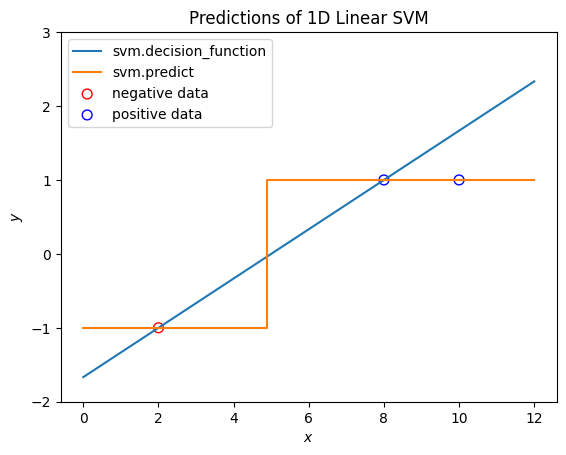

In [25]:
def plot_toy_1d_data(X, t, title, support=None):  # You can use this function throughout the lab
    """
    Plots 1-dimensional data X with targets t.
    
    If 'support' is given, it specifies the indices of data points in X that
    are the support vectors of an SVM. Those points will be circled to highlight them.
    """
    plt.scatter(X[t==-1], t[t==-1], s=50, edgecolors='r', facecolors='none', label='negative data')
    plt.scatter(X[t==+1], t[t==+1], s=50, edgecolors='b', facecolors='none', label='positive data')
    if support is not None:
        plt.scatter(X[support], t[support], s=200, edgecolors='g', facecolors='none')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.ylim(-2, 3)
    plt.title(title)
    plt.legend()

# Your code here. Aim for 4-6 lines. You can call the above function too.
interval = np.linspace(0, 12)
interval = interval.reshape(len(interval), 1)
plt.plot(interval, svm.decision_function(interval), label='svm.decision_function')
plt.step(interval, svm.predict(interval), label='svm.predict')
plot_toy_1d_data(X, t, 'Predictions of 1D Linear SVM')

<div style="border-bottom: 3px solid black;"></div>

### Exercise 1.4 &mdash; Compare SVM to Logistic Regression

A 1-dimensional logistic regression classifier predicts class probabilities using the form $\sigma(w_1 x + w_0)$. The quantity $\hat{y}(x)=w_1 x + w_0$ used as input to the sigmoid is the classifier's "decision function," and it plays the same role as the decision function of an SVM: the actual class prediction for $x$ can be written $\mathrm{sign}(\hat{y}(x)) \in \{-1, +1\}$.

Here you are asked to train a **[sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)** object on the same data, and compare is decision function and predictions to that of the SVM. You should end up with the following plot:

![image](img/svm-prediction-toy-2.png)


**Write code** to train a _LogisticRegression_ object with no regularization (*penalty='none'*). Then write code to plot the result of the **[decision_function](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.decision_function)** and **[predict](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict)** methods of _LogisticRegression_, on top of your SVM's predictions.

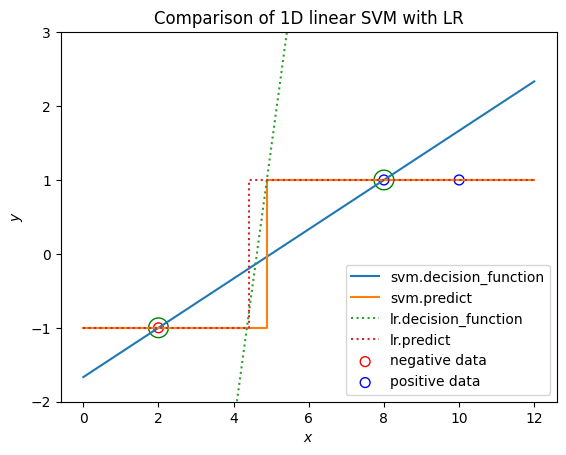

In [26]:
# Your training code here. Aim for 1-2 lines.
logReg = sklearn.linear_model.LogisticRegression(penalty='none')
logReg.fit(X, t)

# Your prediction and plotting code here. Aim for 5-7 lines.
plt.plot(interval, svm.decision_function(interval), label='svm.decision_function')
plt.step(interval, svm.predict(interval), label='svm.predict')
plt.plot(interval, logReg.decision_function(interval), label='lr.decision_function', linestyle='dotted')
plt.step(interval, logReg.predict(interval), label='lr.predict', linestyle='dotted')
plot_toy_1d_data(X, t, 'Comparison of 1D linear SVM with LR', support=svm.support_)

For fun, you can see an animation of logistic regression "training" if you use *LogisticRegression* object's *max_iter* parameter to stop training early and plot the resulting decision function. To do this, re-run your code cell with *max_iter=4*, then with *max_iter=5*, and so on. (Don't worry about the *ConvergenceWarning* &mdash; everything is fine!)

<div style="border-bottom: 3px solid black;"></div>

### Exercise 1.4 &mdash; Build a non-separable 1D data set

Update your $X$ matrix and $t$ vector to include a new $4^\text{th}$ point $(x_4, t_4) = (11, -1)$. This will make the data *non-separable* in one dimension.

**Write code** to define new _X_ and _t_ variables with the same data as Exercise 1.1 but this time with the 4th data point. Easy!

In [27]:
# Your code here. Aim for 2-4 lines.
X = np.array([2,8,10, 11], dtype='float64').reshape(4, 1)
t = np.array([-1, 1, 1, -1], dtype='int32')

<div style="border-bottom: 3px solid black;"></div>

### Exercise 1.5 &mdash; Fit a linear SVM to the non-separable data

**Write code** to fit an _SVC_ object with linear kernel to this new data and plot the decision function just as before. You should get the plot below. What changed in terms of the decision function and decision boundary? What changed in terms of the support vectors?

![image](img/svm-prediction-toy-3.png)

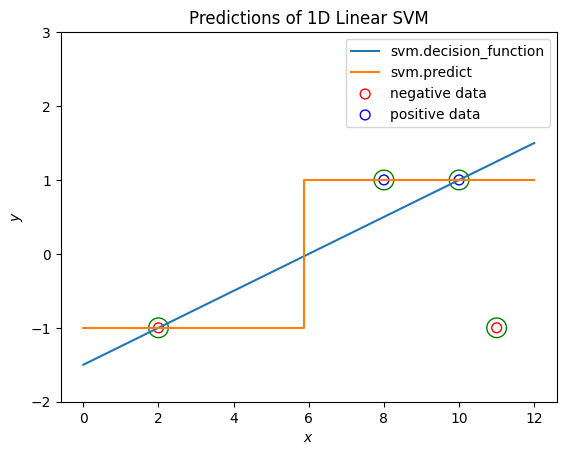

In [28]:
# Your training code here. Aim for 1-2 lines.
svm = sklearn.svm.SVC(kernel='linear')
svm.fit(X, t)

# Your prediction and plotting code here. Aim for 3-5 lines.
plt.plot(interval, svm.decision_function(interval), label='svm.decision_function')
plt.step(interval, svm.predict(interval), label='svm.predict')
plot_toy_1d_data(X, t, 'Predictions of 1D Linear SVM', support=svm.support_)

<div style="border-bottom: 3px solid black;"></div>

### Exercise 1.6 &mdash; Fit a polynomial SVM to the non-separable data

**Repeat Exercise 1.5** using an _SVC_ object with a "polynomial kernel", which in one dimension is $k(x, x') = (x x' + c)^d$.


See the **[sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)** documentation for how to specify the kernel and related parameters. Use polynomial degree $d=2$ and try different coefficients for the constant different $c$ such as $\{0, 0.1, 1, 2, 3\}$ until you get a plot similar to the one below. Note that these parameters are called _degree_ and _coef0_ on the _SVC_ object. (Scikit-learn's polynomial kernel also has a _gamma_ scaling factor; just set *gamma=1* for this exercise.)

![image](img/svm-prediction-toy-4.png)

Ask yourself:
* *Would this fit be possible if we tried to fit a regular polynomial to this data, rather than an SVM?*
* *Does the first decision threshold seem like its maximizing the margin in the original 1-dimensional feature space?*


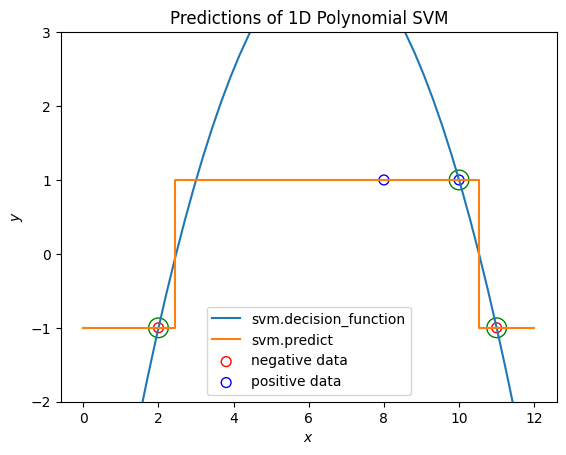

In [34]:
# Your training code here. Aim for 1-2 lines.
svm = sklearn.svm.SVC(kernel='poly', degree=2, coef0=3, gamma=1)
svm.fit(X, t)

# Your prediction and plotting code here. Aim for 3-5 lines.
plt.plot(interval, svm.decision_function(interval), label='svm.decision_function')
plt.step(interval, svm.predict(interval), label='svm.predict')
plot_toy_1d_data(X, t, 'Predictions of 1D Polynomial SVM', support=svm.support_)

**Try setting** coefficient $c=0$ and degree $d=4$ (or higher) and re-run your code cell above. Notice how the training time suddenly gets noticeably longer, despite the ridiculously small training set and state-of-the-art SVM implementation (LIBSVM). In real-life, wildly varying training times can be a big problem with SVMs.

<div style="border-bottom: 3px solid black;"></div>

### Exercise 1.7 &mdash; Fit an RBF SVM (Gaussian kernel) to the non-separable data

**Repeat Exercise 1.5** using an _SVC_ object with a "radial basis function (RBF) kernel," which in one dimension is $k(x, x') = \exp \left(-\gamma \left| x - x' \right|^2\right)$ where $\gamma$ is the 'spread' coefficient.

See the **[sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)** documentation for how to specify the RBF kernel, and see the SVM lecture slides on "Gaussian kernel" for description of how it is influenced by the _gamma_ ($\gamma$) coefficient. The _degree_ and _coef0_ parameters are not used for RBF kernels.

Use $\gamma=1$ to get a plot similar to the one below.

![image](img/svm-prediction-toy-5.png)

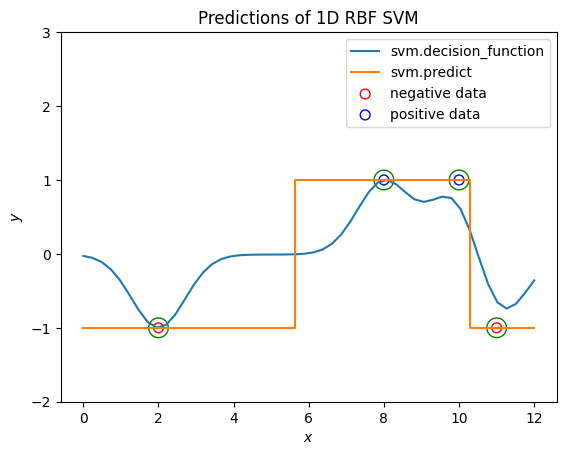

In [35]:
# Your training code here. Aim for 1-2 lines.
svm = sklearn.svm.SVC(kernel='rbf', gamma=1)
svm.fit(X, t)

# Your prediction and plotting code here. Aim for 3-5 lines.
plt.plot(interval, svm.decision_function(interval), label='svm.decision_function')
plt.step(interval, svm.predict(interval), label='svm.predict')
plot_toy_1d_data(X, t, 'Predictions of 1D RBF SVM', support=svm.support_)

**Modify the spread coefficient** to be a large value like $\gamma=10$ and re-run your code cell above. What happens to the decision function? Does anything happen to the actual decision boundary? What happens to the rightmost decision threshold when you make $\gamma=0.1$, and why?

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

# 2. Loading real data and fitting an SVM to it

Exercises 2.1&ndash;2.3 ask you to load a real data set, train an SVM on it, and make predictions on new test data.

**Run the code cell below** to define some utility functions you will need.

In [36]:
def get_data_extent(X):
    """
    Given an Nx2 matrix X, returns a good range of values for plotting
    the data, in the form (x1min, x1max, x2min, x2max).
    """
    dilation = 1.2
    x1min, x2min = X.min(axis=0)
    x1max, x2max = X.max(axis=0)
    x1mid = (x1max + x1min)/2
    x2mid = (x2max + x2min)/2
    x1min = x1mid - (x1mid - x1min)*dilation
    x1max = x1mid + (x1max - x1mid)*dilation
    x2min = x2mid - (x2mid - x2min)*dilation
    x2max = x2mid + (x2max - x2mid)*dilation
    return (x1min, x1max, x2min, x2max)
    
def plot_2d_decision_function(model, extent):
    """
    Plots the decision function of a model as a red-blue heatmap.
    The region evaluated, along with x and y axis limits, are determined by 'extent'.
    """
    x1min, x1max ,x2min, x2max = extent    
    x1, x2 = np.meshgrid(np.linspace(x1min, x1max, 200),
                         np.linspace(x2min, x2max, 200))
    X = np.column_stack([x1.ravel(), x2.ravel()])
    y = model.decision_function(X).reshape(x1.shape)
    plt.imshow(-y, extent=extent, origin='lower', vmin=-1, vmax=1, cmap='bwr', alpha=0.5)
    plt.contour(x1, x2, y, levels=[0], colors='k')  # Decision boundary
    plt.xlim([x1min, x1max])
    plt.ylim([x2min, x2max])
    plt.gca().set_aspect('auto')

<div style="border-bottom: 3px solid black;"></div>

### Exercise 2.1 &mdash; Load data from a CSV file and plot it

CSV files contain comma-separated data, sometimes with a header line to hint at what the numbers mean. In this exercise you'll be loading **[data_train.csv](data_train.csv)**, a file accompanying this lab. Here's a preview of its contents:
```
mean_texture,mean_compactness,label
19.59,0.08,0
17.88,0.16,1
17.60,0.17,1
10.91,0.05,0
13.16,0.09,0
...
```
The first two comman-separated columns are features. They encode characteristics of cell nuclei in breast cancer samples. The labels are binary: 0 for benign, 1 for malignant.
 
**Write a few lines of code** to:
1. load this CSV file from disk into a single array,
2. split the columns into feature matrix $X$ and target vector $t$, and
3. rescale the targets $t$ from $\{0,1\}$ to integers $\{-1,+1\}$.

Use the **[np.loadtxt](https://numpy.org/devdocs/reference/generated/numpy.loadtxt.html)** function to load the data for you. Use the _delimiter_ parameter to tell Numpy how to separate each line (by comma) and use the _skiprows_ argument to tell Numpy to skip the header line that contains the feature names (since the header line contains text, not numbers). Use the ndarray **[astype](https://numpy.org/devdocs/reference/generated/numpy.ndarray.astype.html)** method to convert the targets from type *np.float64* to type *np.int32*, since they are integer labels.

In [37]:
# Your code here. Aim for 3 lines.
data = np.loadtxt('data_train.csv', delimiter=',', skiprows=1)
X, t = data[:, :-1], data[:, -1]
t = sklearn.preprocessing.minmax_scale(t, feature_range=(-1, 1))
t = t.astype('int32')

**Check your answer** by running the code cell below.

In [38]:
assert 'X' in globals(), "No X variable!" 
assert 't' in globals(), "No t variable!" 
assert isinstance(X, np.ndarray)
assert isinstance(t, np.ndarray)
assert X.shape == (100,2), "X was wrong shape!"
assert X.dtype in (np.float32, np.float64), "X was wrong data type!"
assert t.shape == (100,), "t was wrong shape!"
assert t.dtype == np.int32, "t was wrong data type!"
assert np.array_equal(X[0], [19.59, 0.08]), "Wrong features in X!"
assert np.array_equal(X[-1], [16.03, 0.06]), "Wrong features in X!"
assert np.array_equal(t[0:6], [-1,1,1,-1,-1,-1]), "Wrong labels in t!"
print("Correct!")

Correct!


**Write plotting code** to plot your features data in two dimensions. Your plot should look like this:
![image](img/svm-breast-data.png)

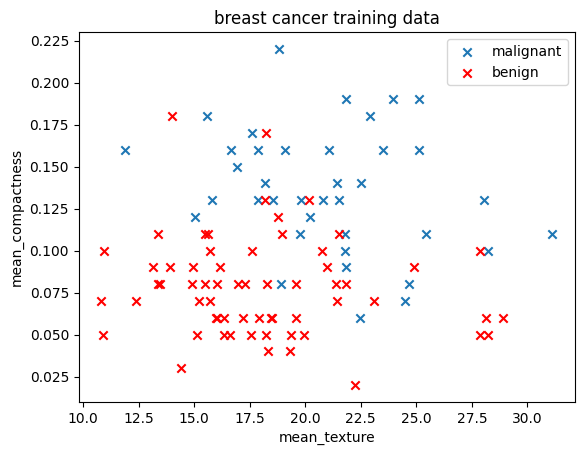

In [39]:
def plot_breast_data(X, t, title):
    # Your code here. Aim for 2 lines, plus a few for labels/title/legend.
    plt.scatter(X[:,:1][t==+1], X[:,1:2][t==+1], marker='x', label='malignant')
    plt.scatter(X[:,:1][t==-1], X[:,1:2][t==-1], c='r', marker='x', label='benign')
    plt.xlabel('mean_texture')
    plt.ylabel('mean_compactness')
    plt.title(title)
    plt.legend()
    
plot_breast_data(X, t, 'breast cancer training data')

<div style="border-bottom: 3px solid black;"></div>

### Exercise 2.2 &mdash; Train an RBF SVM on the breast cancer data

You must train an RBF SVM on the breast cancer data. Your final result should look like this:

![image](img/svm-breast-rbf-1.png)

If your decision function does _not_ look like the above, then check the relative scale of the features and consider preprocessing your data. Do you understand why the RBF kernel gave such terrible predictions on the 'raw' features?

**Write a few lines of code** to train an _SVC_ object on the data and plot the resulting predictor. Use $\gamma=1$ for the RBF kernel.

**Optional:** plot the support vectors as little green circles, using Matplotlib's _scatter_ function, just like the *plot_toy_1d_data* function did from Exercise 1.3.

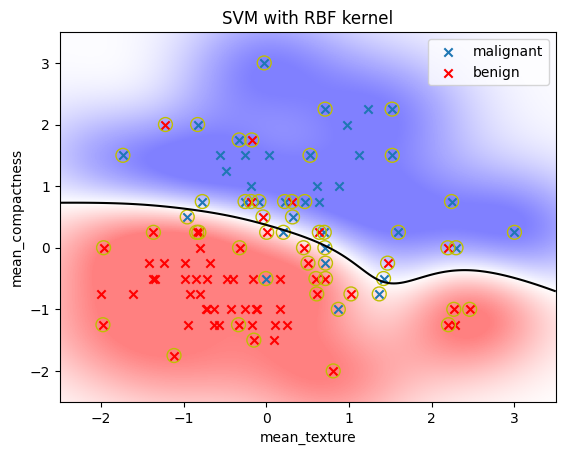

In [42]:
# Your training code here. Aim for 3 lines.
svm = sklearn.svm.SVC(kernel='rbf', gamma=1)
X = sklearn.preprocessing.minmax_scale(X, feature_range=(-2, 3))
svm.fit(X,t)


# Your plotting code here. Aim for 4-5 lines. You can use plot_2d_decision_function defined earlier.
plot_2d_decision_function(svm, get_data_extent(X))
plot_breast_data(X, t, 'SVM with RBF kernel')
plt.scatter(X[:, :1][svm.support_], X[:, 1:2][svm.support_], s=100, edgecolors='y', facecolors='none')

**Try different spread coefficients** by setting $\gamma=0.1$ and $\gamma=10$. What do you observe in terms of the decision boundary? What do you observe in terms of the number of support vectors?. When finished, re-train your model with the original $\gamma=1$ and proceed to the final exercise.

<div style="border-bottom: 3px solid black;"></div>

### Exercise 2.3 &mdash; Evaluate your SVM on held-out test data

Here you must use your _SVC_ object from Exercise 2.2 to make predictions on data from **[data_test.csv](data_test.csv)**, a held-out test set for the breast cancer data.

**Write a few lines of code** to load the features and labels for the test data (just like you did for the training data in Exercise 2.1). Then make predictions on the test set. To see what fraction of your SVM predictions were correct on the test set, read the documentation for the **[sklearn.metrics.accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)** function and print the accuracy that it returns.

In [43]:
# Your data loading code here. Aim for 3-4 lines.
data = np.loadtxt('data_test.csv', delimiter=',', skiprows=1)
X_test, t_test = data[:, :-1], data[:, -1]
X_test = sklearn.preprocessing.minmax_scale(X_test, feature_range=(-2, 4))
t_test = sklearn.preprocessing.minmax_scale(t_test, feature_range=(-1, 1))
t_test = t_test.astype(np.int32)

# Your prediction and reporting code here. Aim for 2-3 lines.
t_pred = svm.predict(X_test)
sklearn.metrics.accuracy_score(t_test, t_pred)


0.815

If your accuracy is below 80%, then maybe you likely didn't process your test features correctly.